## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the aerial image
image_path = "swimming_pool/000000079.jpg"  # Replace with the actual image path
image = cv2.imread(image_path)

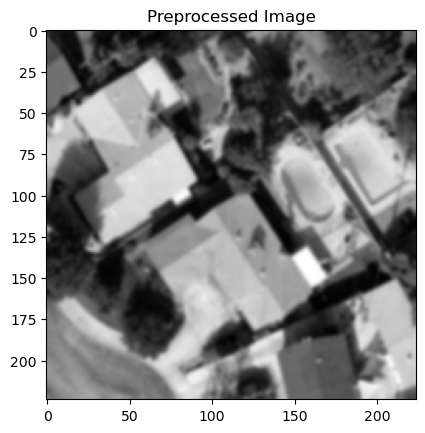

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Display the preprocessed image
plt.imshow(blurred, cmap="gray")
plt.title("Preprocessed Image")
plt.show()

## Image Processing

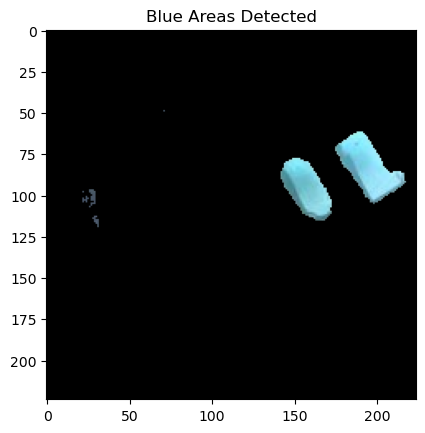

In [5]:
# Convert image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define blue color range for pool detection
#lower_blue = np.array([80, 50, 50])   # Adjust as needed
#lower_blue = np.array([80, 100, 100])  # Increased saturation and value minimums
lower_blue = np.array([80, 70, 100]) 

upper_blue = np.array([130, 255, 255])

# Create a mask to detect blue regions
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Apply bitwise operation to extract pools
pool_regions = cv2.bitwise_and(image, image, mask=mask)

# Show the detected blue areas
plt.imshow(cv2.cvtColor(pool_regions, cv2.COLOR_BGR2RGB))
plt.title("Blue Areas Detected")
plt.show()

In [11]:
# Apply light morphological operations to clean noise
kernel = np.ones((2,2), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

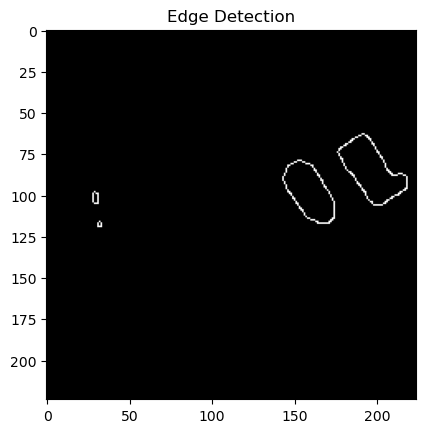

In [12]:
# Apply Canny Edge Detection
edges = cv2.Canny(mask, 50, 150)
# Show the detected blue areas
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()

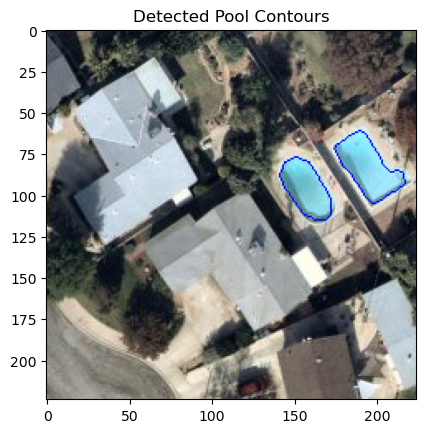

In [ ]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area
min_area = 300  # Adjust this value based on your image
filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        filtered_contours.append(contour)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 1)  # blue color

# Display result
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Pool Contours")
plt.show()


In [8]:
# Print number of pools detected
print(f"Number of pools detected: {len(filtered_contours)}")

Number of pools detected: 2


## Save the Output

In [16]:
coordinate_path = "output/coordinates.txt"
image_path = "output/output_image.jpg"

In [ ]:


# Save detected pool coordinates
with open(coordinate_path, "w") as f:
    for contour in filtered_contours:
        coords = contour.reshape(-1, 2)  # Reshape to (x, y) format
        for point in coords:
            f.write(f"{point[0]},{point[1]}\n")
        f.write("\n")  # Separate pools

# Save the output image with blue contours
cv2.imwrite(image_path, contour_image)

print(f"Coordinates saved in {coordinate_path}")
print(f"Output image saved as {image_path}")


Coordinates saved in output/coordinates.txt
Output image saved as output/output_image.jpg


## Load the pool coordinates

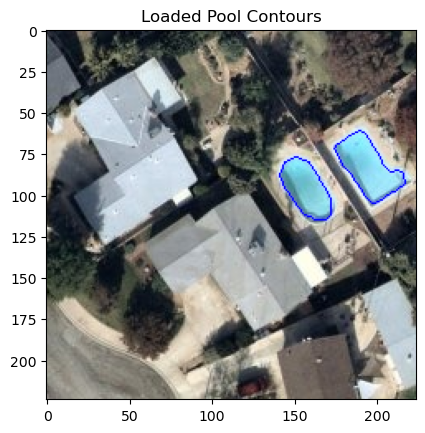

In [19]:
# Load the image
image = cv2.imread(image_path)

# Read the coordinates from the file
contours = []
with open(coordinate_path, "r") as f:
    contour = []
    for line in f:
        line = line.strip()
        if line:
            x, y = map(int, line.split(","))
            contour.append([x, y])
        else:
            if contour:  # If a contour exists, add it and reset
                contours.append(np.array(contour, dtype=np.int32))
                contour = []

# Draw contours on the image
cv2.drawContours(image, contours, -1, (255, 0, 0), 1)  # Blue color contours

# Save or display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#cv2.imwrite("output/image_with_contours.jpg", image)
plt.title("Loaded Pool Contours")
plt.show()

